# Gradiente Descendente


## A ideia geral do algoritmo é relaticamente simples, dado um mátrica a ser minimzada, iremos tomar sua derivada, que representa a taxa de variação, e iremos empregar esta, atualoizando os parâmetros do modelo, até que tal derivada seja nula.

## Suponto uma variável $w$, iremos o atualizar de acordo com

## $w_i = w_{i-1} - \alpha \frac{dL}{dw} $

## Em que L é a métrica de erro, pode ser o erro quadrático ou o erro absoluto, erro quadrático médio. Em geral não é "tão importante", as vezes a escolha de uma métrica específica pode ajudar.

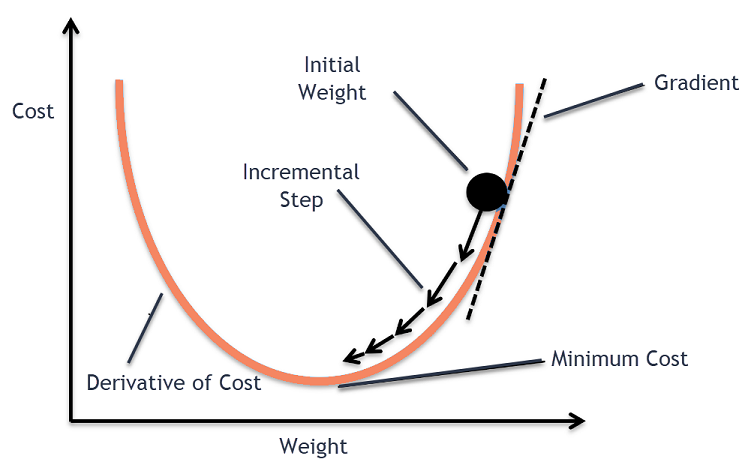

## O parametro $\alpha$ é o passo que o peso toma para chegar no mínimo.

## Passos muito pequenos podem fazer o algoritmo demorar muito;

## Passos muito grandes podem fazer o algoritmo divergir;

## geralmente usasse passos entre [0,1];

## Como encontrar o melhor valor dos passos? Não existe uma regra, na maioria dos textos lhe informaram que esta é uma quantidade empírica, e de fato é. Uma estratégia que eu gosto de usar é observar o quanto o primeiro gradiente irá resultar, e usar um lr que garante que o produto do grad com o lr gere algo entre [0,1]. 

## Isto pois eu sei que o gradiente não irá estourar logo de início.

## No exemplo abaixo, iremos encontrar pos parametros de uma simples função quadrática usando tal método.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [163]:
f = lambda x,w: x @ w # Função que descreve uma parabola para o nosso caso, em que temos
# f: X[:,0]*w[0] + X[:,1]*w[1] + X[:,2]*w[2]

w = np.random.normal(0,1,(3,1)) # pesos

X = np.arange(-20,20,0.1).reshape(-1,1) # dados

y = X**2 + 5*X + 1 # função a ser encontrada, que não conhecemos, porém sabemos é uma função polinomial 

X_in = np.append(X**2,np.append(X,np.ones(X.shape),axis = 1),axis = 1).reshape(-1,3) # adicionando 1 para poder fazer o produto interno ao invés de multiplicações
print(X_in)

[[400.   -20.     1.  ]
 [396.01 -19.9    1.  ]
 [392.04 -19.8    1.  ]
 ...
 [388.09  19.7    1.  ]
 [392.04  19.8    1.  ]
 [396.01  19.9    1.  ]]


In [164]:
def grad(X,y,w,lr = 0.001):
    lr = 0.00001
    for _ in range(1000):
        yhat = f(X,w)
        loss = np.mean((y - yhat)**2)
        for i in range(len(w)):
            w[i] += (lr*(y-yhat).T @ X[:,i])/len(yhat)
        print('loss:',loss)

    return w.reshape(-1,1)

In [166]:
for i in range(100):
    w = grad(X_in,y,w)
    print(w)

loss: 0.0015954088278662176
loss: 0.0015953946467033846
loss: 0.0015953804656668698
loss: 0.0015953662847560163
loss: 0.0015953521039714779
loss: 0.001595337923312974
loss: 0.0015953237427807482
loss: 0.0015953095623741117
loss: 0.0015952953820935769
loss: 0.0015952812019393498
loss: 0.001595267021911106
loss: 0.0015952528420086973
loss: 0.0015952386622328108
loss: 0.0015952244825824834
loss: 0.00159521030305837
loss: 0.0015951961236603874
loss: 0.0015951819443883158
loss: 0.001595167765242106
loss: 0.0015951535862220106
loss: 0.0015951394073282488
loss: 0.0015951252285599951
loss: 0.0015951110499180842
loss: 0.0015950968714023733
loss: 0.0015950826930126595
loss: 0.0015950685147486348
loss: 0.0015950543366109989
loss: 0.0015950401585993045
loss: 0.0015950259807135112
loss: 0.0015950118029538181
loss: 0.0015949976253198967
loss: 0.001594983447812441
loss: 0.0015949692704308243
loss: 0.0015949550931752751
loss: 0.0015949409160455868
loss: 0.0015949267390419025
loss: 0.001594912562164499

In [167]:
print('Pesos finais: ', w.flatten())

Pesos finais:  [1.00016007 5.00000964 0.96158423]


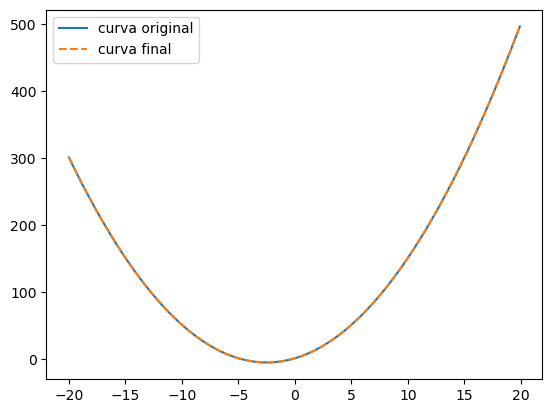

In [170]:
plt.plot(X,y,label = 'curva original')
plt.plot(X,f(X_in,w),'--',label = 'curva final')
plt.legend()

## É possível notar que o chegamos bem perto do ideal.

## Contudo ainda existe um erro, que pode eventualmente fazer as duas curvas divergirem;

## Como os fatores que acompanham X são quase iguais aos analíticos, então o modelo se comportará bem, contudo, este caso não necessariamentes será verdade sempre;

## Para melhorar ainda mais o algoritmo, ao invés de realizar o gradiente em todos os dados de uma vez, é possível dividir o mesmo em quadros de tamanhos fixos, e isto ajudará ao algoritmo convergir mais rapidamente Chamamos esta abordagem de mini-batch gradiente descendente;

## Ou seja, ao invés de passar os 400 dados, podemos passar apenas 10 primeiros e atualizar os pesos, após isto os 10-20 e atualiza, isso até ter passado por todos os pontos, sendo isto apenas uma única iteração. No nosso caso, iriamos realizar este processo 1000 vezes, sendo que o loop interno de cada conjunto de 10 equivale a 40, totalizando 40000 iterações;

## Outra forma é o gradiente descendente estocástico, em que se passa apenas uma amostra por vez. Pode ser usado se tiver poucos dados, geralmente a abordagem acima é melhor!

## Resumidamente, 

* ## GD é mais estável e geralmente converge mais rápido, porém é muito custoso e pode facilmente cair em mínimos locais;
* ## GD estocástico possui convergencia lente, contudo é capaz de fugir de mínimos locais; 
* ## GD com mini-batch tem o melhor dos dois mundos, convergência boa e capaz de fugir de mínimos locais. O tamanho do batch é um hiperparâmetro e um desafio a ser encontrado. O que muda significativamente de um batch para outro é o tempo para convergir.

## 